# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## BRCA


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_BRCA_soft.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 17th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > BRCA
    
**Dependent files:**

* Target (Cancer) data: 
    - *BRCA_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
BRCA_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/BRCA_Interface_2021-11-17.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-11-17 16:25:31 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: BRCA

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('brca', BRCA_PATH)]
)

2021-11-17 16:25:31 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `brca` ..
2021-11-17 16:25:31 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_brca_data` ..
2021-11-17 16:25:31 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:25:31 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:25:31 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_brca data materials  ..


#### TCGA Cancer Datasets

##### BRCA

In [4]:
display_data(predator.data_materials["brca"])

Data dimensions: (7739, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


#### Preprocessed TCGA Cancer Datasets

##### BRCA

In [5]:
display_data(predator.data_materials["target_brca_data"])

Data dimensions: (7739, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P28062,R216W,P40306,0.2406,0.246427,0.8858,0.823800,0.789252,0.441485,0.077736,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,Q15842,E237K,Q14654,0.4663,0.441520,0.4623,0.472829,2.112660,0.986541,0.235649,...,684.0,131.720,131.479,129.5260,129.5260,0.000,0.000,0.00,2.48410,2.92169
2,Q15842,E237K,P63252,0.4663,0.441520,0.5380,0.535672,2.342750,0.990924,0.130527,...,678.0,142.706,142.107,99.1151,99.1190,0.000,624.350,0.00,2.70474,3.18529


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('brca', BRCA_PATH)]
)

2021-11-17 16:25:35 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `brca` ..
2021-11-17 16:25:35 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_brca_data` ..
2021-11-17 16:25:35 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-17 16:25:35 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-17 16:25:35 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_brca data materials  ..


In [7]:
predator.predict(voting='soft')

2021-11-17 16:25:36 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-17 16:25:36 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-17 16:25:36 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-11-17 16:25:36 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-11-17 16:25:36 | DEBUG    | Predator | Predicting on brca cohort ..
2021-11-17 16:25:36 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-17 16:25:36 | DEBUG    | helpers.helpers_predator.models | X shape: (7739, 10)
2021-11-17 16:25:36 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2,

In [8]:
predator.predictions.keys()

dict_keys(['brca_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["brca_prob"][:3]

[array([[0.31207333, 0.68792667],
        [0.51557159, 0.48442841],
        [0.52629418, 0.47370582],
        ...,
        [0.72889416, 0.27110584],
        [0.69144626, 0.30855374],
        [0.41159421, 0.58840579]]),
 array([[1.        , 0.        ],
        [0.5       , 0.5       ],
        [0.5       , 0.5       ],
        ...,
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.72708333, 0.27291667]]),
 array([[0.25538061, 0.74461939],
        [0.56166173, 0.43833827],
        [0.62112679, 0.37887321],
        ...,
        [0.66700035, 0.33299965],
        [0.71433658, 0.28566342],
        [0.62706517, 0.37293483]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2021-11-17 16:25:43 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:25:43 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort brca ..
2021-11-17 16:25:43 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:25:43 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with brca cancer dataset ..
2021-11-17 16:25:43 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:26:20 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1023): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.658070  Q9Y616    F419L     Q16288
1    0.386894  Q9Y616    F419L     Q16288
2    0.337170  P04637    R280K     Q13625
3    0.715480  P04637    R280K     Q13625
4    0.715480  P04637    R280K     Q13625
2021-11-17 16:26:52 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 1065): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0      0.6625  Q9Y616    F419L     Q16288
1      0.0000  Q9Y616    F419L     Q16288
2      1.0000  Q9UL54    V301M     P46734
3      1.0000  Q9UL54    V301M     P46734
4      0.0000  Q9UL54    V301M     P46734
2021-11-17 16:27:27 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 973): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.503014  Q9UKS6     R24H     Q9UNF0
1    0.401699  Q9UKS6     R24H     Q9UNF0
2    

In [11]:
predator.predictions.keys()

dict_keys(['brca_prob', 'brca_predicted_probs_datasets', 'brca_predicted_valid_datasets', 'brca_predicted_invalid_datasets', 'brca_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["brca_predicted_probs_datasets"][0])

Data dimensions: (7739, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.687927,P28062,P28062,R216W,done,interface,COSM451277,-,-,Proteasome,...,417.0,156.750,156.868,49.1868,49.1868,566.065,367.205,933.27,5.37939,3.28969
1,0.484428,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,684.0,131.720,131.479,129.5260,129.5260,None,None,None,2.48410,2.92169
2,0.473706,Q15842,Q15842,E237K,done,interface,COSM430893,-,-,IRK,...,678.0,142.706,142.107,99.1151,99.1190,None,624.35,None,2.70474,3.18529


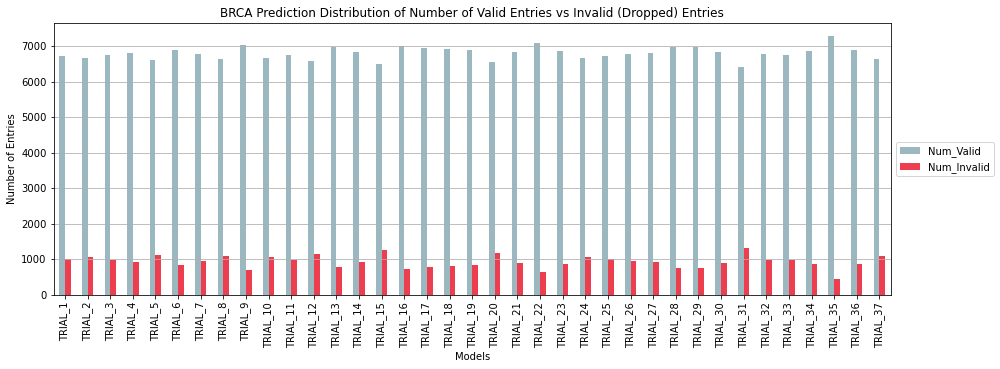

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("brca")

2021-11-17 16:49:51 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


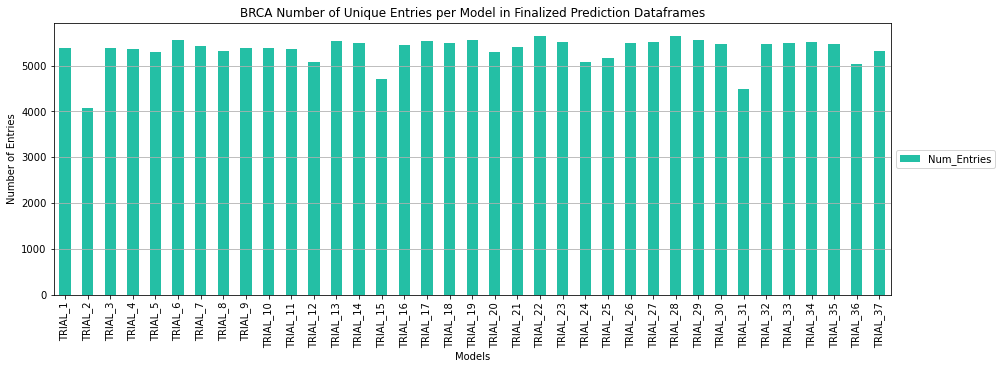

In [14]:
predator.predictions.plot_num_finalized_predictions("brca")

In [15]:
display_data(predator.predictions['brca_finalized_prediction_dataframes'][0])

Data dimensions: (5376, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.687927,P28062,R216W,P40306
1,0.484428,Q15842,E237K,Q14654
2,0.473706,Q15842,E237K,P63252


In [16]:
predator.prepare_ensemble_prediction_data()

2021-11-17 16:49:52 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-17 16:49:52 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for brca taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-17 16:59:17 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for brca is prepared.
Accessible from `brca_predictions_prob_data`.
2021-11-17 16:59:17 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for brca is prepared.
Accessible from `brca_ensemble_prediction_data`.
2021-11-17 16:59:17 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for brca.
Accessible from predictions.['brca_prediction_results']
2021-11-17 16:59:17 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for brca.
Accessible from predictions.['brca_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['brca_predictions_prob_data'])

Data dimensions: (4137, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.687927,0.0,0.744619,0.661794,0.77877,0.409717,0.52508,0.667998,0.457932,0.548571,...,0.407393,0.677672,0.644282,0.648854,0.520715,0.433647,0.608671,0.533072,0.55345,1
1,0.484428,0.5,0.438338,0.56447,0.540543,0.424724,0.453792,0.38312,0.41145,0.483677,...,0.491898,0.566304,0.564276,0.495411,0.395133,0.474974,0.475675,0.434741,0.48443,0
2,0.473706,0.5,0.378873,0.504237,0.464638,0.396814,0.445907,0.381273,0.381446,0.476872,...,0.47963,0.566304,0.560347,0.495198,0.372764,0.472045,0.475675,0.427009,0.47205,0


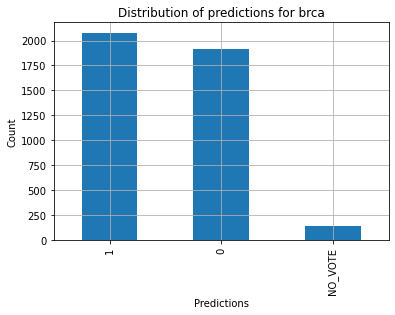

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("brca")

In [19]:
brca_prediction_results_soft = predator.predictions['brca_prediction_results']
display_data(brca_prediction_results_soft)

Data dimensions: (4137, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,1
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


In [20]:
brca_prediction_results_soft_no_votes_dropped = predator.predictions["brca_prediction_results_no_votes_dropped"]
display_data(brca_prediction_results_soft_no_votes_dropped)

Data dimensions: (3997, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P28062,R216W,P40306,1
1,Q15842,E237K,Q14654,0
2,Q15842,E237K,P63252,0


Label counts:
Disrupting                1918
Increasing + No Effect    2079
Name: Prediction, dtype: int64


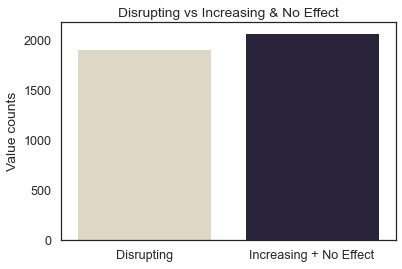

In [21]:
visualize_label_counts(brca_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
brca_ensemble_prediction_data_soft = predator.predictions["brca_ensemble_prediction_data"]

In [23]:
brca_predictions_prob_data_soft = predator.predictions["brca_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
brca_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["brca_prediction_results"],
    predictions_prob_data=predator.predictions["brca_predictions_prob_data"]
)
brca_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P28062,R216W,P40306,1,0.55345
1,Q15842,E237K,Q14654,0,0.48443
2,Q15842,E237K,P63252,0,0.47205
3,Q9UKS6,R24H,Q9BY11,0,0.49584
4,Q9UKS6,R24H,Q9UNF0,0,0.41309


In [26]:
brca_prediction_results_soft_no_votes_dropped_with_median_probabilities = brca_prediction_results_soft_with_median_probs[
    brca_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(brca_prediction_results_soft_no_votes_dropped_with_median_probabilities)

3997

## Exporting Predictions

In [28]:
# brca_prediction_results = brca_prediction_results_hard_no_votes_dropped
# brca_prediction_results = brca_prediction_results_soft_no_votes_dropped
brca_prediction_results = brca_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(brca_prediction_results)

Data dimensions: (3997, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P28062,R216W,P40306,1,0.55345
1,Q15842,E237K,Q14654,0,0.48443
2,Q15842,E237K,P63252,0,0.47205


In [29]:
predator.export_prediction(
    tcga="brca",
    data=brca_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-11-17 16:59:43 | DEBUG    | helpers.helpers_predator.common | Folder with ID 558297b6 is created.
2021-11-17 16:59:43 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder brca_prediction_2021-11-17\558297b6..
2021-11-17 16:59:43 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/brca_prediction_2021-11-17\558297b6\predictions_soft_2021-11-17.csv is exported successfully.
2021-11-17 16:59:43 | INFO     | helpers.helpers_predator.common | Config is exported.


---